In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import idx2numpy as idx2np

In [4]:
train_images = idx2np.convert_from_file("../data/mnist-dataset/train-images.idx3-ubyte")
train_labels = idx2np.convert_from_file("../data/mnist-dataset/train-labels.idx1-ubyte")
test_images  = idx2np.convert_from_file("../data/mnist-dataset/t10k-images.idx3-ubyte")
test_labels  = idx2np.convert_from_file("../data/mnist-dataset/t10k-labels.idx1-ubyte")

print(train_images.shape)  # (60000, 28, 28)
print(train_labels.shape)  # (60000,)

(60000, 28, 28)
(60000,)


In [5]:
# Reshape images to (num_samples, 784)
X_train = train_images.reshape((train_images.shape[0], -1))
X_test = test_images.reshape((test_images.shape[0], -1))

# Optional: normalize pixel values (0–255) → (0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = train_labels
y_test = test_labels

In [6]:

model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=10,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_jobs=-1,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)

/opt/anaconda3/envs/sago/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:38:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1745056743506/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1, num_class=10, ...)

In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9795

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



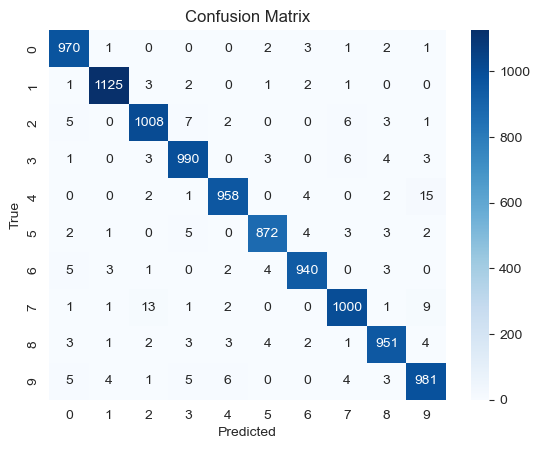

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()